In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../cardio_train.csv", sep=";")

In [3]:
#create new variable bmi
#BMI = kg/(m^2)

df["bmi"] = df["weight"]/((df["height"]/100)**2)

Cardio is our variable of interest. The plot below shows the distribution of cardio: It has values 0 and 1, at approximately equal frequency.

Text(0.5, 1.0, 'Histogram of Cardio')

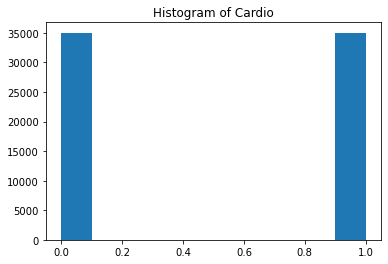

In [10]:
#visualize cardio
plt.hist(df.cardio)
plt.title("Histogram of Cardio")

Age is an important variable. Cardiovascular disease is more common among older people than younger people.

Text(0.5, 1.0, 'Histogram of Age')

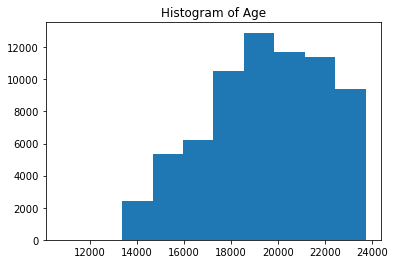

In [11]:
#visualize age
plt.hist(df.age)
plt.title("Histogram of Age")

`ap_hi` and `ap_lo` represent blood pressure, and they are correlated. As they increase, the likelihood of cardio also increases.

In [5]:
df = df[df["ap_hi"] < 200]
df = df[df["ap_hi"] > 110]
df = df[df["ap_lo"] < 150]
df = df[df["ap_lo"] > 60]

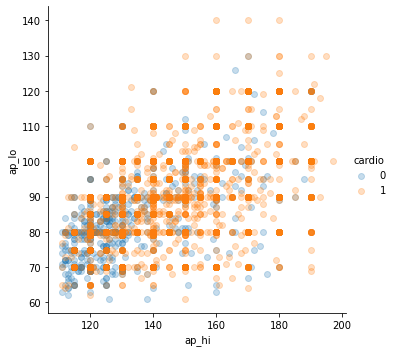

In [6]:
#visualize blood pressure
sns.lmplot('ap_hi', 'ap_lo', data=df, hue='cardio', fit_reg=False, scatter_kws={'alpha':0.25})

Plot histograms of each variable, split by cardio

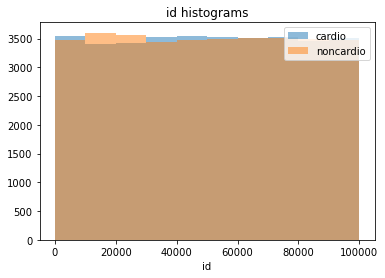

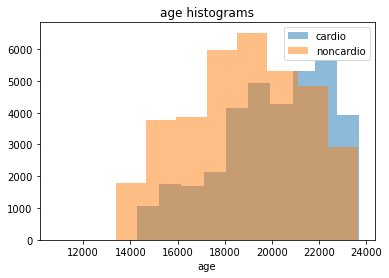

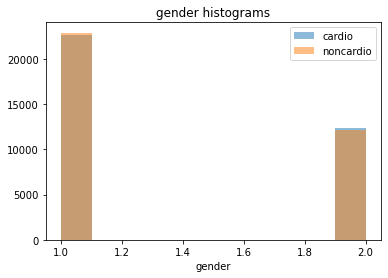

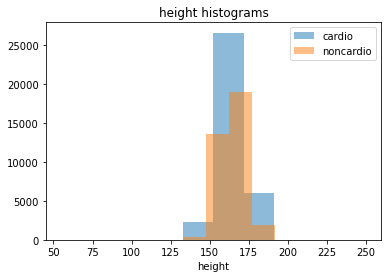

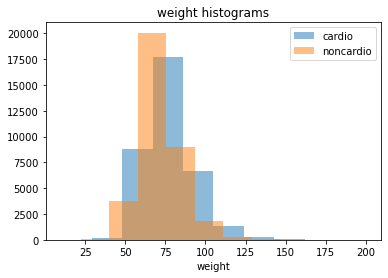

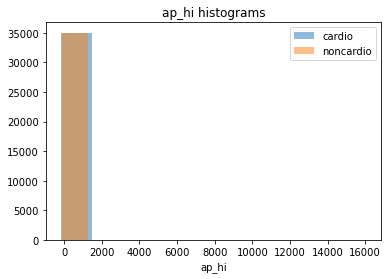

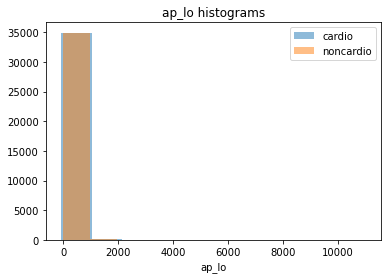

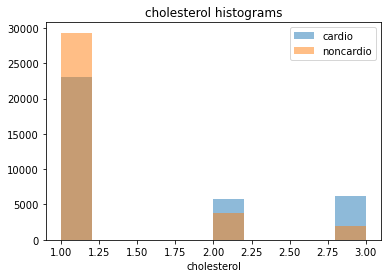

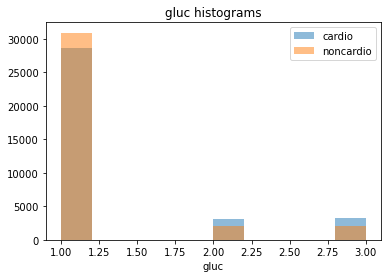

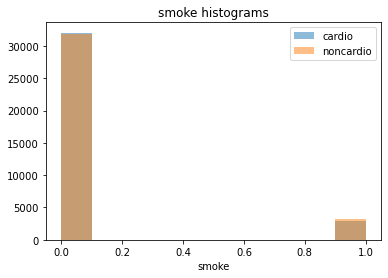

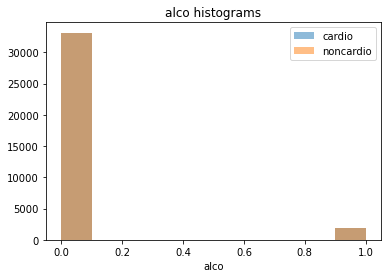

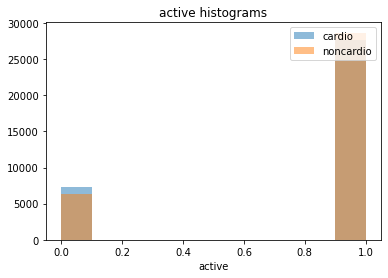

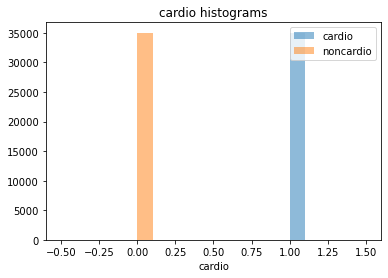

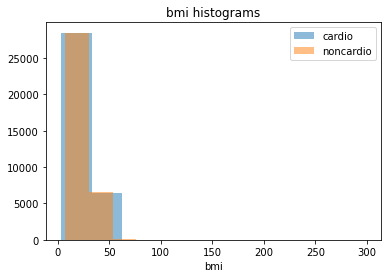

In [4]:
cardio = df[df["cardio"]==1]
noncardio = df[df["cardio"]==0]

for col in df.columns:
    plt.hist(cardio[col], alpha=0.5, label='cardio')
    plt.hist(noncardio[col], alpha=0.5, label='noncardio')
    plt.title(col + " histograms")
    plt.xlabel(col)
    plt.legend(loc='upper right')
    plt.show()



In [5]:
#scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
df_scaled = pd.DataFrame(scaler.transform(df))

[0.14851834 0.13839942]


Text(0, 0.5, 'PC2')

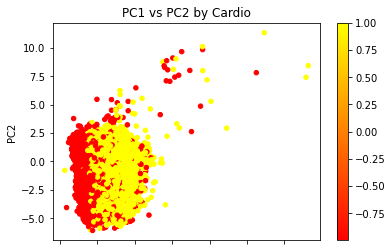

In [9]:
#PCA with scaled data

from sklearn.decomposition import PCA

X = df_scaled
y = df_scaled[12]

pca = PCA(n_components=2)
X_pca = pca.fit(X).transform(X)

print(pca.explained_variance_ratio_)

df_pca = pd.DataFrame(X_pca)

ax = df_pca.plot.scatter(0, 1, c=y, colormap='autumn')
#newfig = plt.figure()
ax.set_title('PC1 vs PC2 by Cardio')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')